#1. Importing Required libraries


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot

#2. Loading Data Set

In [ ]:
# Read data from CSV files
df_manufacturer = pd.read_csv('/content/drive/MyDrive/Naan Mudalvan/country_vaccinations_by_manufacturer.csv')
df_vaccinations = pd.read_csv('/content/drive/MyDrive/Naan Mudalvan/country_vaccinations.csv')

#Cloumns present in given data set

In [ ]:
df_manufacturer.columns

Index(['location', 'date', 'vaccine', 'total_vaccinations'], dtype='object')

In [ ]:
df_vaccinations.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

#Shape of DataFrames


In [ ]:
df_manufacturer.shape

(35623, 4)

In [ ]:
df_vaccinations.shape

(86512, 15)

#Information about given data sets

In [ ]:
df_manufacturer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35623 entries, 0 to 35622
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            35623 non-null  object
 1   date                35623 non-null  object
 2   vaccine             35623 non-null  object
 3   total_vaccinations  35623 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [ ]:
df_vaccinations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

#Vaccines Manufactured on a particular Date

In [ ]:
df_manufacturer = df_manufacturer[df_manufacturer.date == '2022-02-04']
df_manufacturer.head()

,location,date,vaccine,total_vaccinations
2305,Argentina,2022-02-04,CanSino,468481
2306,Argentina,2022-02-04,Moderna,5318406
2307,Argentina,2022-02-04,Oxford/AstraZeneca,25606912
2308,Argentina,2022-02-04,Pfizer/BioNTech,11225368
2309,Argentina,2022-02-04,Sinopharm/Beijing,27396208


#Country wise Vaccination status on a particular Date

In [ ]:
df_vaccinations = df_vaccinations[df_vaccinations.date == '2022-02-04']
df_vaccinations.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
347,Afghanistan,AFG,2022-02-04,NaN,NaN,NaN,NaN,12299.0,NaN,NaN,NaN,309.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
784,Albania,ALB,2022-02-04,NaN,NaN,NaN,NaN,16144.0,NaN,NaN,NaN,5619.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1204,Algeria,DZA,2022-02-04,NaN,NaN,NaN,NaN,16222.0,NaN,NaN,NaN,364.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",World Health Organization,https://covid19.who.int/
1613,Andorra,AND,2022-02-04,NaN,NaN,NaN,NaN,126.0,NaN,NaN,NaN,1629.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
1991,Angola,AGO,2022-02-04,NaN,NaN,NaN,NaN,83460.0,NaN,NaN,NaN,2460.0,Oxford/AstraZeneca,World Health Organization,https://covid19.who.int/


#3. Preprocessing Data

#Checking for Missing Values

No missing values in manufacturers table

In [ ]:
df_manufacturer.isna().sum()

location              0
date                  0
vaccine               0
total_vaccinations    0
dtype: int64

But, it is present in country wise vaccine utilization

In [ ]:
df_vaccinations.isna().sum()

country                                  0
iso_code                                 0
date                                     0
total_vaccinations                     112
people_vaccinated                      119
people_fully_vaccinated                115
daily_vaccinations_raw                 132
daily_vaccinations                       0
total_vaccinations_per_hundred         112
people_vaccinated_per_hundred          119
people_fully_vaccinated_per_hundred    115
daily_vaccinations_per_million           0
vaccines                                 0
source_name                              0
source_website                           0
dtype: int64

#Dropping Missing values present in total_vaccinations attribute

In [ ]:
df_vaccinations = df_vaccinations.drop(df_vaccinations[df_vaccinations.total_vaccinations.isna()].index)

In [ ]:
df_vaccinations.isna().sum()

country                                 0
iso_code                                0
date                                    0
total_vaccinations                      0
people_vaccinated                       8
people_fully_vaccinated                 4
daily_vaccinations_raw                 20
daily_vaccinations                      0
total_vaccinations_per_hundred          0
people_vaccinated_per_hundred           8
people_fully_vaccinated_per_hundred     4
daily_vaccinations_per_million          0
vaccines                                0
source_name                             0
source_website                          0
dtype: int64

#Dropping Missing values present in people_vaccinated & daily_vaccinations_raw attributes

In [ ]:
df_vaccinations = df_vaccinations.drop(df_vaccinations[df_vaccinations.people_vaccinated.isna()].index)
df_vaccinations = df_vaccinations.drop(df_vaccinations[df_vaccinations.daily_vaccinations_raw.isna()].index)

In [ ]:
df_vaccinations.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                1
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    1
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

#Checking for Null Values

In [ ]:
df_vaccinations.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                1
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    1
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

#Filling Mean values

In [ ]:
df_vaccinations = df_vaccinations.fillna(df_vaccinations.mean())

<ipython-input-86-546bbd149ca8>:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
df_vaccinations.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

#Checking for Duplicated records

No duplications present


In [ ]:
duplicate_rows = df_vaccinations[df_vaccinations.duplicated()]
print(len(duplicate_rows))
print(duplicate_rows)

0
Empty DataFrame
Columns: [country, iso_code, date, total_vaccinations, people_vaccinated, people_fully_vaccinated, daily_vaccinations_raw, daily_vaccinations, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, daily_vaccinations_per_million, vaccines, source_name, source_website]
Index: []


#4. Visualization of Data

#Heatmap Visualization to check correlation between attributes

<ipython-input-139-0e4febe2ed46>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



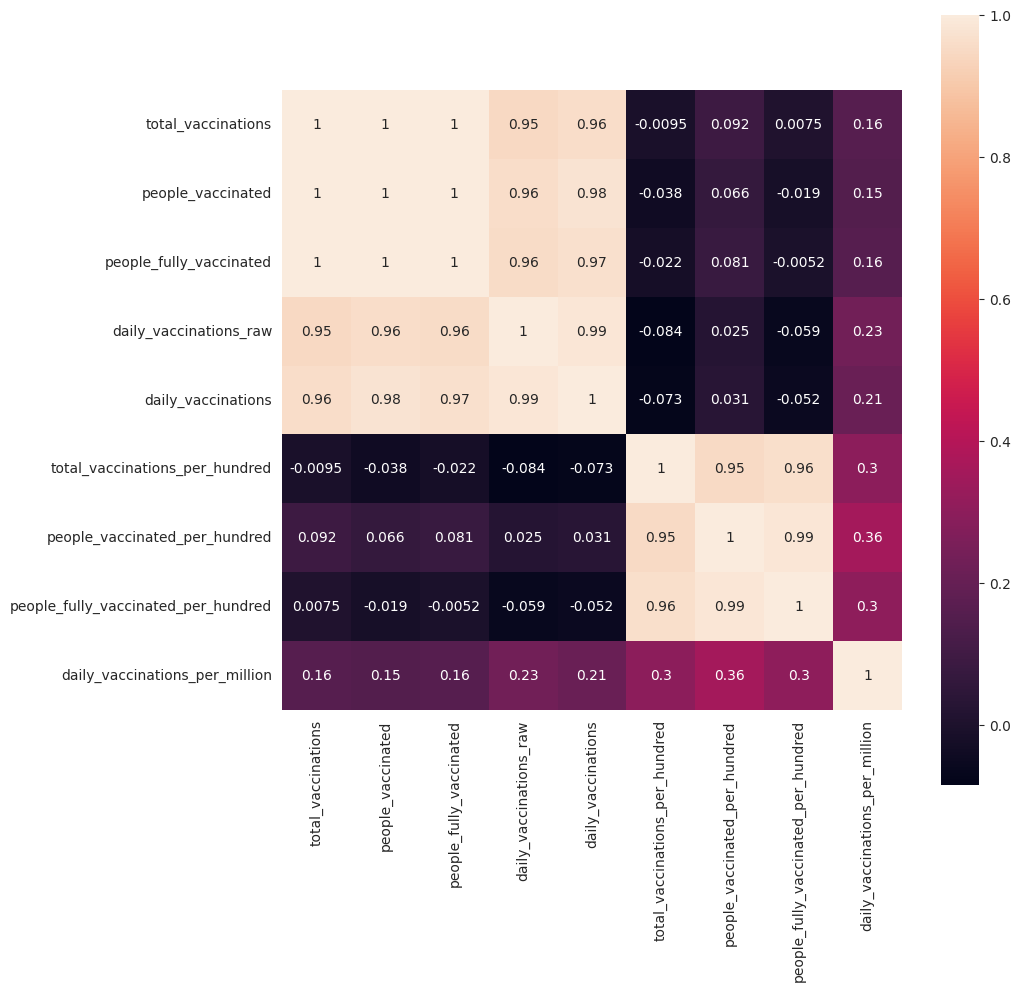

In [ ]:
plt.subplots(figsize = (10,10))
sns.heatmap(df_vaccinations.corr(), annot = True, square = True)
plt.show()

#Top countries in vaccinations Utilization

In [ ]:
df_vaccinations["Total_vaccinations_count"]= df_vaccinations.groupby("country").total_vaccinations.tail(1)
df_vaccinations.groupby("country")["Total_vaccinations_count"].mean().sort_values(ascending= False).head(10)

country
India             1.687048e+09
United States     5.469684e+08
Brazil            3.677782e+08
Pakistan          1.823960e+08
Vietnam           1.816654e+08
Mexico            1.685357e+08
Germany           1.666940e+08
Russia            1.553786e+08
Turkey            1.427355e+08
United Kingdom    1.384598e+08
Name: Total_vaccinations_count, dtype: float64

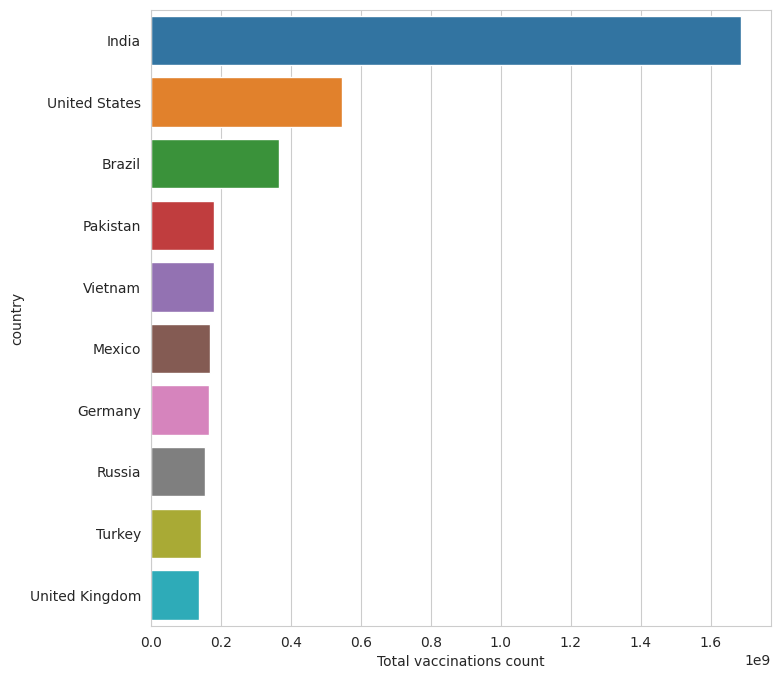

In [ ]:
x= df_vaccinations.groupby("country")["Total_vaccinations_count"].mean().sort_values(ascending= False).head(10)
sns.set_style("whitegrid")
plt.figure(figsize= (8,8))
ax= sns.barplot(x=x.values,y=x.index)
ax.set_xlabel("Total vaccinations count")
plt.show()

#Fully Vaccinated Count

In [ ]:
df_vaccinations["Full_vaccinations_count"]= df_vaccinations.groupby("country").people_fully_vaccinated.tail(1)

df_vaccinations.groupby("country")["Full_vaccinations_count"].mean().sort_values(ascending= False).head(10)

country
India            724768356.0
United States    213893460.0
Brazil           150682483.0
Pakistan          84731497.0
Mexico            77478070.0
Vietnam           74187748.0
Russia            70232028.0
Germany           61873548.0
Iran              54405243.0
Turkey            52489431.0
Name: Full_vaccinations_count, dtype: float64

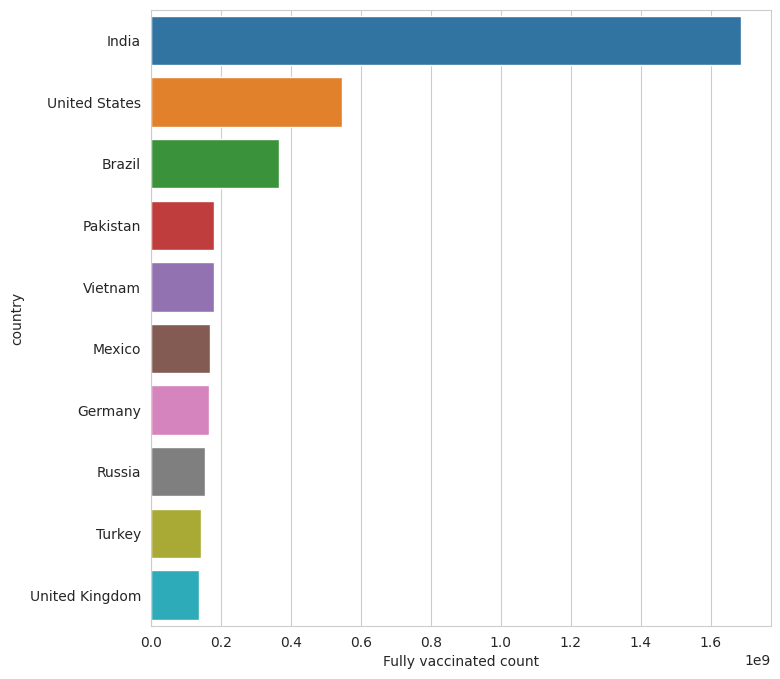

In [ ]:
#barplot visualization of top countries with most full vaccinations

sns.set_style("whitegrid")
plt.figure(figsize= (8,8))
ax= sns.barplot(x=x.values,y=x.index)
ax.set_xlabel("Fully vaccinated count")
plt.show()


#Most commonly used vaccines in the World

In [ ]:
total  = df_manufacturer.groupby('vaccine').sum()

px.bar(x=total.index, y=total['total_vaccinations'],
                   title='Most Used Vaccine in the World')

<ipython-input-144-905327196644>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
df_vaccinations = df_vaccinations[ df_vaccinations['date'] == '2022-02-04']
df_vaccinations = df_vaccinations.sort_values(by='people_vaccinated_per_hundred',ascending=False)
fig=px.bar(df_vaccinations.head(10), x='country', y='people_vaccinated_per_hundred',
                   title='People Vaccinated per Hundred for the Date 2022-02-04')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

#Type of vaccine utilized Vs Count

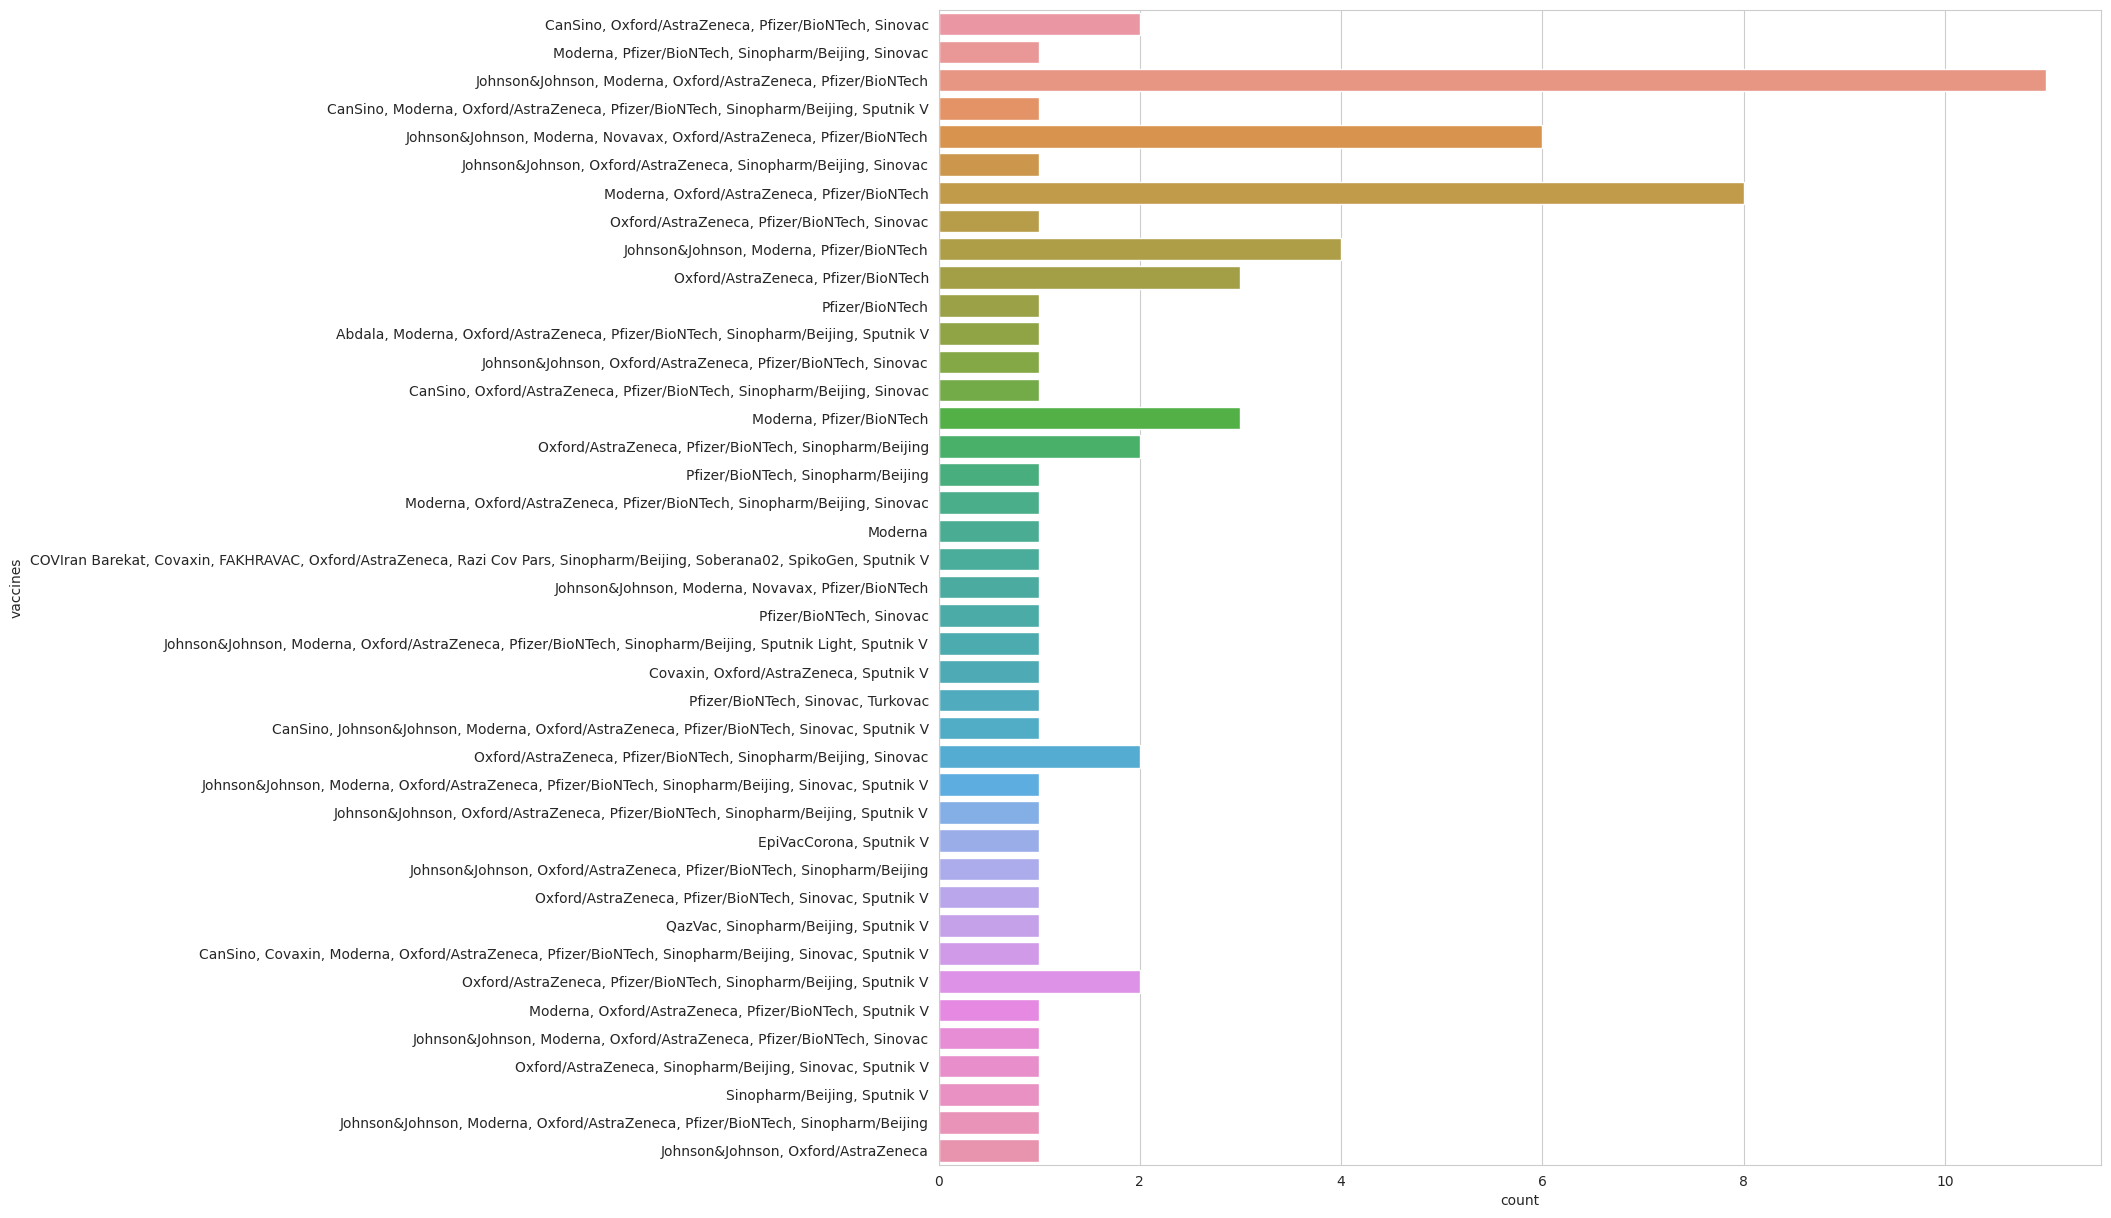

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(y= "vaccines",data= df_vaccinations)
plt.show()

#Vaccination per hundred top countries

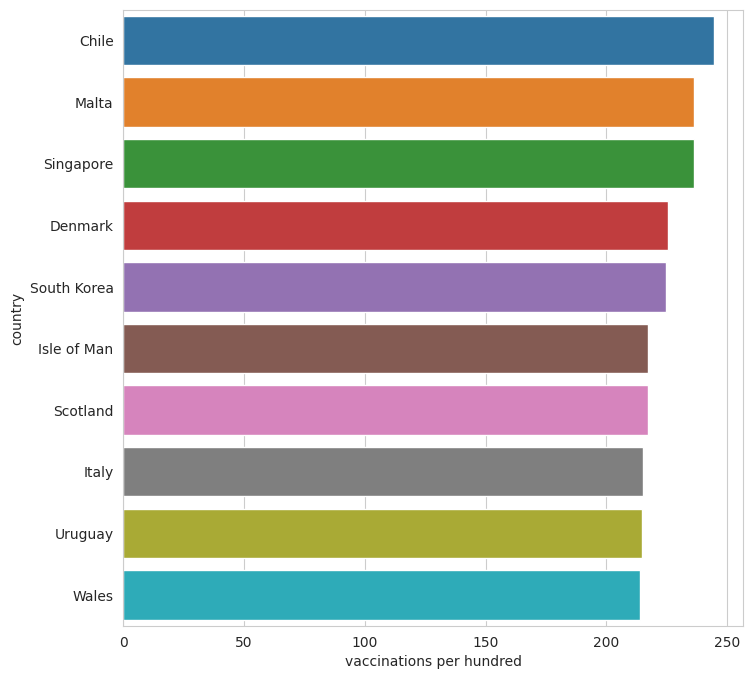

In [ ]:
df_vaccinations["Total_vaccinations_per_hundred"]= df_vaccinations.groupby("country").total_vaccinations_per_hundred.tail(1)
x= df_vaccinations.groupby("country")["Total_vaccinations_per_hundred"].mean().sort_values(ascending= False).head(10)
plt.figure(figsize= (8,8))
ax= sns.barplot(x=x.values,y=x.index)
ax.set_xlabel("vaccinations per hundred")
plt.show()

#Statistical Analysis of given Data sets

In [ ]:
df_manufacturer.describe()

,total_vaccinations
count,1.600000e+02
mean,1.574315e+07
std,5.730594e+07
min,0.000000e+00
25%,2.378710e+05
50%,1.569373e+06
75%,9.042346e+06
max,5.821192e+08


In [ ]:
df_vaccinations.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,Total_vaccinations_count,Full_vaccinations_count,Total_vaccinations_per_hundred
count,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,74.000000,74.000000,74.000000,74.000000,7.400000e+01,7.400000e+01,74.000000
mean,7.341445e+07,3.528194e+07,3.046394e+07,2.092764e+05,1.883525e+05,156.099054,66.902568,61.848356,2717.594595,7.341445e+07,3.046394e+07,156.099054
std,2.094558e+08,1.149868e+08,8.904082e+07,6.877380e+05,7.106291e+05,55.557095,18.881493,18.963029,2015.192040,2.094558e+08,8.904082e+07,55.557095
min,6.936300e+04,2.667600e+04,2.607400e+04,0.000000e+00,7.000000e+00,9.610000,7.670000,3.970000,88.000000,6.936300e+04,2.607400e+04,9.610000
25%,3.041524e+06,1.438836e+06,1.296678e+06,3.582500e+03,3.229500e+03,119.397500,57.685000,52.137500,1287.750000,3.041524e+06,1.296678e+06,119.397500
50%,1.300016e+07,6.382784e+06,5.586156e+06,3.372050e+04,2.401850e+04,166.300000,72.355000,68.120000,2115.000000,1.300016e+07,5.586156e+06,166.300000
75%,6.246783e+07,2.616142e+07,2.915660e+07,1.294548e+05,1.485200e+05,198.355000,80.177500,75.490000,3309.500000,6.246783e+07,2.915660e+07,198.355000
max,1.687048e+09,9.487174e+08,7.247684e+08,5.530743e+06,5.964928e+06,244.500000,91.900000,88.550000,9154.000000,1.687048e+09,7.247684e+08,244.500000


In [ ]:
df_manufacturer.vaccine.value_counts()

Pfizer/BioNTech       39
Moderna               35
Johnson&Johnson       33
Oxford/AstraZeneca    30
Novavax                8
Sinovac                6
Sinopharm/Beijing      4
CanSino                2
Sputnik V              2
Covaxin                1
Name: vaccine, dtype: int64

#Daily vaccinations per million top countries

In [ ]:
df_vaccinations.groupby("country")["daily_vaccinations_per_million"].mean().sort_values(ascending= False).head(20)

country
Finland         9154.0
New Zealand     8800.0
Australia       8621.0
Italy           6733.0
Peru            6609.0
Saudi Arabia    6330.0
Iran            6280.0
Argentina       5814.0
Canada          5165.0
Brazil          4864.0
Pakistan        4841.0
India           4281.0
Greece          4055.0
Singapore       3951.0
Luxembourg      3845.0
Mexico          3792.0
Thailand        3718.0
South Korea     3447.0
Kenya           3315.0
Hong Kong       3293.0
Name: daily_vaccinations_per_million, dtype: float64

#Preferred vaccine in India

In [ ]:
x= df_vaccinations[df_vaccinations["country"]=="India"]
z= x.vaccines.value_counts()
c= list(z.index)
c

['Covaxin, Oxford/AstraZeneca, Sputnik V']

#Country wise daily vaccination per million

In [ ]:
def trace_bar(data, feature, title, xlab, ylab,color):
    data = data.sort_values(feature, ascending=False)
    trace = go.Bar(
            x = data['country'],
            y = data[feature],
            marker=dict(color=color),
            text=data['country']
        )
    data = [trace]

    layout = dict(title = title,
            xaxis = dict(
                title = xlab,
                showticklabels=True,
                tickangle=45,
                zeroline=True,
                zerolinewidth=1,
                zerolinecolor='grey',
                showline=True,
                linewidth=2,
                linecolor='black',
                mirror=True,
                tickfont=dict(
                        size=10,
                        color='black'),),


            yaxis = dict(
                title = ylab,
                gridcolor='lightgrey',
                zeroline=True,
                zerolinewidth=1,
                zerolinecolor='grey',
                showline=True,
                linewidth=2,
                linecolor='black',
                mirror=True),

            plot_bgcolor = 'rgba(0, 0, 0, 0)',
            paper_bgcolor = 'rgba(0, 0, 0, 0)',
            hovermode = 'closest'
             )
    fig = dict(data = data, layout = layout)
    iplot(fig)


trace_bar(df_vaccinations, 'daily_vaccinations_per_million', 'Daily vaccinations per million per country', 'Country','Daily vaccinations per million', "magenta" )

In [ ]:
number_of_days = (df_vaccinations["date"].max() -df_vaccinations["date"].min() ).days
data=pd.DataFrame(columns=['Country', 'Vaccine', 'Total_vaccine'])
dtfrm=data[data["Vaccine"]=="Pfizer/BioNTech"]
dtfrm = dtfrm.drop(dtfrm[dtfrm['Country'] == 'European Union'].index)
dtfrm.head(10)

TypeError: ignored